Magda Gucman, 17/11/2022

# Example Dashboard

## Filled polygon

fill() draws a filled polygon based on lists of point coordinates x, y.

This example uses the Koch snowflake as an example polygon.

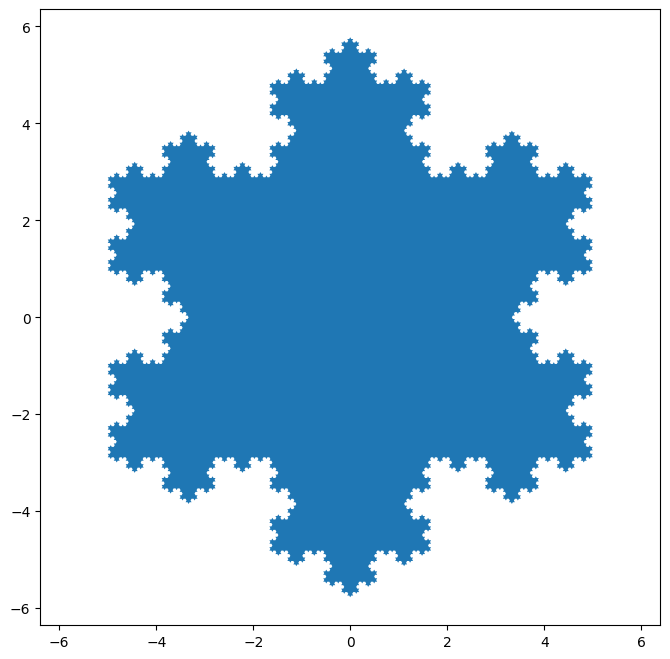

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()


## Plotting the coherence of two signals

An example showing how to plot the coherence of two signals.

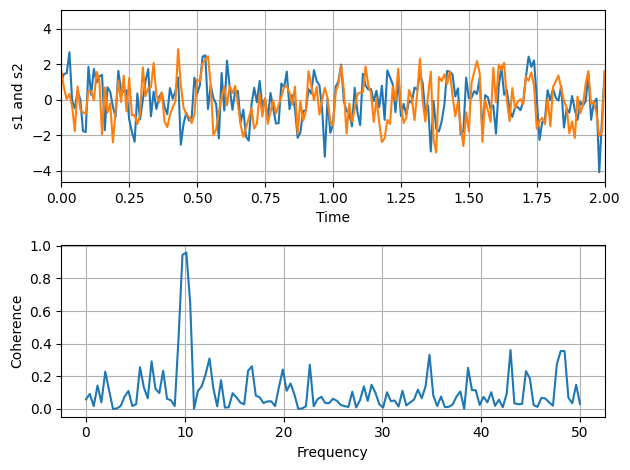

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')

fig.tight_layout()
plt.show()

## Polar Legend

Demo of a legend on a polar-axis plot.

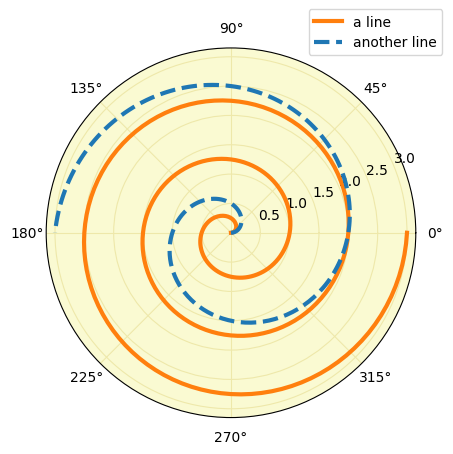

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection="polar", facecolor="lightgoldenrodyellow")

r = np.linspace(0, 3, 301)
theta = 2 * np.pi * r
ax.plot(theta, r, color="tab:orange", lw=3, label="a line")
ax.plot(0.5 * theta, r, color="tab:blue", ls="--", lw=3, label="another line")
ax.tick_params(grid_color="palegoldenrod")
# For polar axes, it may be useful to move the legend slightly away from the
# axes center, to avoid overlap between the legend and the axes.  The following
# snippet places the legend's lower left corner just outside of the polar axes
# at an angle of 67.5 degrees in polar coordinates.
angle = np.deg2rad(67.5)
ax.legend(loc="lower left",
          bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))

plt.show()